# Introduction

With The Academy introducing new representation and inclusion requirements for movies to be eligible for the Oscar Best Picture award, diversity in film has become a hot topic. While some believe these requirements force movie plots to adhere to social norms, many movie lovers rejoice as they can look forward to seeing characters on the screen they can identify with. When films include characters from underrepresented groups, viewers of those underrepresented groups are able to feel affirmed in their identity. That being said, I would like to bring up the topic of LGBT+ representation in cinema. 

According to Gallup polls, the number of Americans who identify as a member in the LGBT+ community grows every year. In 2017, nearly 5% of Americans adults identified as either lesbian, gay, bisexual or transgender (LGBT). These statistics also do not include non-binary, pansexual, asexual, aromantic, and other groups. As the LGBT+ community grows, it is important that LGBT+ representation in cinema grows as well. Going further, it is important that these representations are accurate and valid portrayals. Movie critics can assess accurate representation of LGBT+ persons using the Vito Russo Test.


## What is the Vito Russo Test? 


"Taking inspiration from the “Bechdel Test,” which examines the way female characters are portrayed and situated within a narrative, GLAAD developed its own set of criteria to analyze how LGBT characters are included within a film. The Vito Russo Test takes its name from celebrated film historian and GLAAD co-founder Vito Russo, whose book The Celluloid Closet remains a foundational analysis of LGBT portrayals in Hollywood film. These criteria can help guide filmmakers to create more multidimensional characters while also providing a barometer for representation on a wide scale. This test represents a standard GLAAD expects a greater number of mainstream Hollywood films to reach in the future."

-GLAAD Studio Responsibility Index

### To pass the Vito Russo Test, the following must be true:


 - The film contains a character that is identifiably lesbian, gay, bisexual, and/or transgender.

 - That character must not be solely or predominantly defined by their sexual orientation or gender identity (i.e. they are comprised of the same sort of unique character traits commonly used to differentiate straight/non-transgender characters from one another).

 - The LGBT character must be tied into the plot in such a way that their removal would have a significant effect, meaning they are not there to simply provide colorful commentary, paint urban authenticity, or (perhaps most commonly) set up a punchline. The character must matter.

In order to understand trends in LGBT+ representation in cinema, we will use GLAAD's Studio Responsibility Index (SRI) to look at yearly statistics on representation. While we only have 8 years worth of data from GLAAD, we can get insights into the race, orientation, and gender identity of characters, which studios are most/least inclusive, and whether or not cinema in general is becoming more LGBT+ friendly. 

To begin, let's import our data and all of the libraries we will need for working with the data. 

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


vito_data = pd.read_excel(r"C:\Users\Hatteras\Documents\Vito Russo GLAAD.xlsx")
vito_data.head()

,year,male_characters,female_characters,nonbinary_characters,latino_characters,black_characters,white_characters,asian_pacific_islander_characters,nonhuman_character,bisexual_characters,...,focus_features_profit_in_millions,focus_features_vito_passed,united_artists_releasing_total,united_artists_releasing_inclusive,united_artists_releasing_profit_in_millions,united_artists_vito_passed,stx_films_total,stx_films_inclusive,stx_films_profit_in_millions,stx_films_vito_passed
0,2012.0,63.0,37.0,0.00,3.2,12.9,83.9,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013.0,64.0,36.0,0.00,4.0,12.0,76.0,8.0,0.0,17.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014.0,68.0,32.0,0.00,7.0,11.0,68.0,14.0,0.0,30.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015.0,77.0,23.0,0.00,10.6,8.5,72.3,6.4,2.1,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.0,67.0,31.0,0.01,1.0,13.0,69.0,6.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Every year GLAAD add new categories and studios they wish to include in their Studio Responsibility Index, so that accounts for a lot of the missing data. For this report, we will be sticking to columns with little missing values. Now 

# Analysis
How often are LGBT+ characters accurately represented in a movie? Let's look at the gap between a movie being inclusive versus accurately inclusive. Remember, for a movie to be accurately inclusive, it must pass the requirements of the Vito Russo Test.

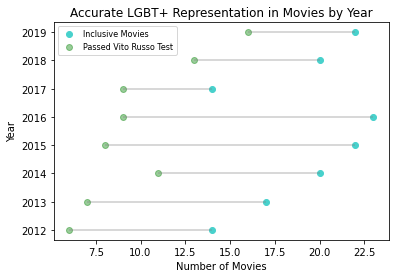

In [2]:
plt.hlines(y=vito_data['year'], xmin=vito_data['total_vito_passed'], xmax=vito_data['inclusive_movies']
    ,color='grey', alpha=0.4)
plt.scatter(vito_data['inclusive_movies'], vito_data['year'], color="mediumturquoise"
            , alpha=1, label='Inclusive Movies')
plt.scatter(vito_data['total_vito_passed'], vito_data['year'], color="green"
            , alpha=0.4 , label='Passed Vito Russo Test')
plt.legend(prop={'size': 8})
plt.title("Accurate LGBT+ Representation in Movies by Year")
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.savefig('AccurateLGBT.jpeg', bbox_inches='tight')

Let's think about what this data is telling us. When the gap is large between inclusive movies and movies passing the Vito Russo Test, we have larger amounts of inaccurate portrayals of LGBT+ members. Similarly, when the gap is small, we have more accurate portrayals in cinema. 

From this visualization, we can tell one thing: As the years go on, we are slowly bridging the gap between simply including an LGBT+ character and accurately/appropriately including an LGBT+ character. Let's look at it another way as well.

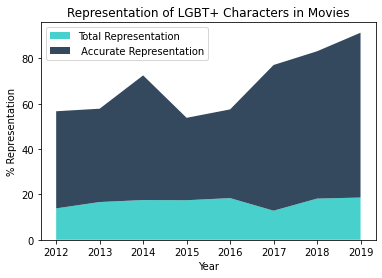

In [3]:
#Create new dataframe columns
vito_data['accurate'] = vito_data['total_vito_passed'] / vito_data['inclusive_movies'] *100
vito_data['percent_inclusive'] = vito_data['inclusive_movies']/vito_data['total_movies']*100


pal = ["mediumturquoise", "#34495e"]
plt.stackplot(vito_data['year'], vito_data['percent_inclusive'], vito_data['accurate'], 
              labels=['Total Representation',' Accurate Representation'], colors=pal)
plt.legend(loc='upper left')
plt.title("Representation of LGBT+ Characters in Movies")
plt.xlabel('Year')
plt.ylabel('% Representation')
plt.savefig('LGBTRepresentation.jpeg')
plt.show()

Even though there is little growth in LGBT+ representation in movies, at least the representation is becoming more accurate.

## Looking Forward
This notebook is only preliminary results, in an effort to introduce the topic.

I plan on looking at the following questions in the near future:

 - How often are LGBT+ people of color being represented?
 - Which studios are best at accurately representing LGBT+ characters? Which studios need improvement?
 - How often are different orientations in LGBT+ being represented?
 
 